In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import re

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#imports the dataset CSV file into a Pandas dataframe.
dataset = pd.read_csv("/content/drive/MyDrive/Consumer_Complaints.csv")
print(dataset.shape)
dataset.head()

(1025010, 19)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217,NaN
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773,NaN
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100,NaN
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638,NaN
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760,NaN


In [ ]:
# we filter the Consumer Complaint and Product columns and we remove the remaining columns from our dataset.
complaints_df = dataset.filter(["Consumer Complaint", "Product"], axis = 1)
complaints_df.head()

,Consumer Complaint,Product
0,NaN,Mortgage
1,I have outdated information on my credit repor...,Credit reporting
2,I purchased a new car on XXXX XXXX. The car de...,Consumer Loan
3,NaN,Credit card
4,NaN,Debt collection


In [ ]:
#Total number of null values in records 0747196.
complaints_df.isnull().sum()

Consumer Complaint    747196
Product                    0
dtype: int64

In [ ]:
#removing null values with the Pandas dropna() function
complaints_df.dropna(inplace=True)
print(complaints_df.shape)
complaints_df.isnull().sum()

(277814, 2)


Consumer Complaint    0
Product               0
dtype: int64

<Axes: ylabel='Product'>

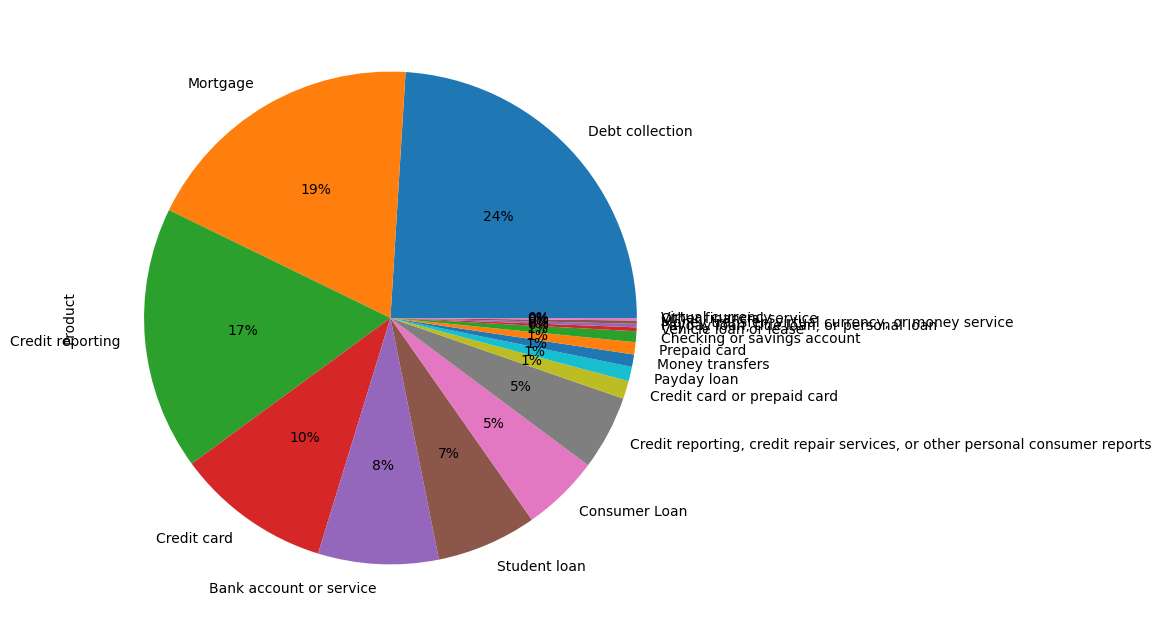

In [ ]:
# pie chart
complaints_df = complaints_df[:100000]

complaints_df.Product.value_counts().plot(kind='pie',
                                          autopct='%1.0f%%',
                                          figsize=(12, 8))

In [ ]:
# remove all special characters and single characters, then we’ll convert the input text to lowercase.
def clean_text(text):

    complaints = []

    for comp in text:
        # remove special characters
        comp = re.sub(r'\W', ' ', str(comp))

        # remove single characters
        comp  = re.sub(r'\s+[a-zA-Z]\s+', ' ', comp )

        # Remove single characters from the beginning
        comp  = re.sub(r'\^[a-zA-Z]\s+', ' ', comp)

        # Converting to Lowercase
        comp  = comp.lower()

        complaints.append(comp)

    return complaints

complaints = clean_text(list(complaints_df['Consumer Complaint']))

In [ ]:
 #To implement this approach, the TfidfVectorizer class from the sklearn.feature_extraction.text module.
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_conv = TfidfVectorizer(max_features=3000, min_df=10, max_df=0.7, stop_words=stopwords.words('english'))
X = tfid_conv.fit_transform(complaints).toarray()

In [ ]:
#need to convert our Product categories into numbers
complaints_df['Product'] = complaints_df['Product'].astype('category')
y = list(complaints_df['Product'].cat.codes)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#RandomForestClassifier class from the sklearn.ensemble module can be used to train our model.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76      1646
           1       1.00      0.04      0.07       142
           2       0.75      0.46      0.57       953
           3       0.71      0.78      0.75      2040
           4       0.75      0.03      0.05       233
           5       0.75      0.86      0.80      3428
           6       0.97      0.40      0.56       994
           7       0.79      0.90      0.84      4840
           8       0.00      0.00      0.00        39
           9       0.86      0.22      0.35       164
          10       0.87      0.95      0.91      3732
          11       1.00      0.05      0.10        20
          12       0.85      0.11      0.20       195
          13       1.00      0.02      0.05        43
          14       0.88      0.28      0.43       162
          15       0.87      0.86      0.86      1308
          16       0.00      0.00      0.00        58
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
